In [1]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")

find_and_append_module_path()
os.getcwd()


New current directory: c:\Users\Robert\Documents\Projekte\statsfaction


'c:\\Users\\Robert\\Documents\\Projekte\\statsfaction'

In [2]:
from prediction_prime_overall.src.predict import predict_and_explain_players, analyze_individual_ID
from prediction_prime_overall.src.eval import create_polar_plot
import prediction_prime_overall.config as CONFIG

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Import your group to analyze

In [3]:
sql_prospect = f"""
SELECT min(Age) as potential_age,* FROM  fifa WHERE  FIFA = 2024 and Age < 23 and potential > 65 and overall <90
GROUP BY ID
order by potential DESC;
"""


import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(CONFIG.DATABASE)

df_prospect = pd.read_sql_query(sql_prospect, conn)

conn.close()

# Seiten wurden umgestellt und Feld hat jetzt neuen Inhalt
# df_prospect['Position'] = [value.strip() for item in df_prospect["Position"] for value in item.split(',')]
# df_prospect['Position'] = [i.replace(' ',',') for i in df_prospect['Position']]

df_prospect.head()

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,FIFA,Att. Position,Composure,Defensive awareness
0,22.0,238794,Vini Jr.,22.0,https://cdn.sofifa.net/players/238/794/24_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,89.0,94.0,Real Madrid,...,18.0,5.0,7.0,7.0,7.0,10.0,2024,None,79.0,32.0
1,20.0,256790,J. Musiala,20.0,https://cdn.sofifa.net/players/256/790/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,86.0,93.0,FC Bayern München,...,68.0,6.0,9.0,8.0,8.0,11.0,2024,None,84.0,64.0
2,20.0,251854,Pedri,20.0,https://cdn.sofifa.net/players/251/854/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,86.0,92.0,FC Barcelona,...,65.0,12.0,7.0,11.0,8.0,8.0,2024,None,87.0,68.0
3,22.0,247635,K. Kvaratskhelia,22.0,https://cdn.sofifa.net/players/247/635/24_60.png,Georgia,https://cdn.sofifa.net/flags/ge.png,86.0,92.0,Napoli,...,34.0,9.0,15.0,8.0,14.0,8.0,2024,None,82.0,38.0
4,20.0,256630,F. Wirtz,20.0,https://cdn.sofifa.net/players/256/630/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,86.0,91.0,Bayer 04 Leverkusen,...,44.0,14.0,14.0,13.0,6.0,10.0,2024,None,83.0,59.0


In [4]:
sum(df_prospect.ID == 259399)

1

In [5]:
df_prospect.Positioning

0       87.0
1       81.0
2       79.0
3       84.0
4       80.0
        ... 
5427     4.0
5428    48.0
5429    59.0
5430    49.0
5431    57.0
Name: Positioning, Length: 5432, dtype: float64

## Choose a from a Set of trained models

In [6]:
import pickle

with open(f"{CONFIG.MODELS}/offense_potential_forward.pkl", "rb") as file:
    loaded_object = pickle.load(file)

chosen_object = loaded_object[ 'Huber Regression']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']
explainer = chosen_object['explainer']
print(chosen_object['Classification Report'])
# print(chosen_object['AUC'])

              precision    recall  f1-score   support

       False       0.93      0.93      0.93        55
        True       0.20      0.20      0.20         5

    accuracy                           0.87        60
   macro avg       0.56      0.56      0.56        60
weighted avg       0.87      0.87      0.87        60



# Analyze individual Players

pred [77.29333904]
[(268421, 'M. Tel', 2024)]


100%|██████████| 1/1 [00:00<00:00,  8.94it/s]


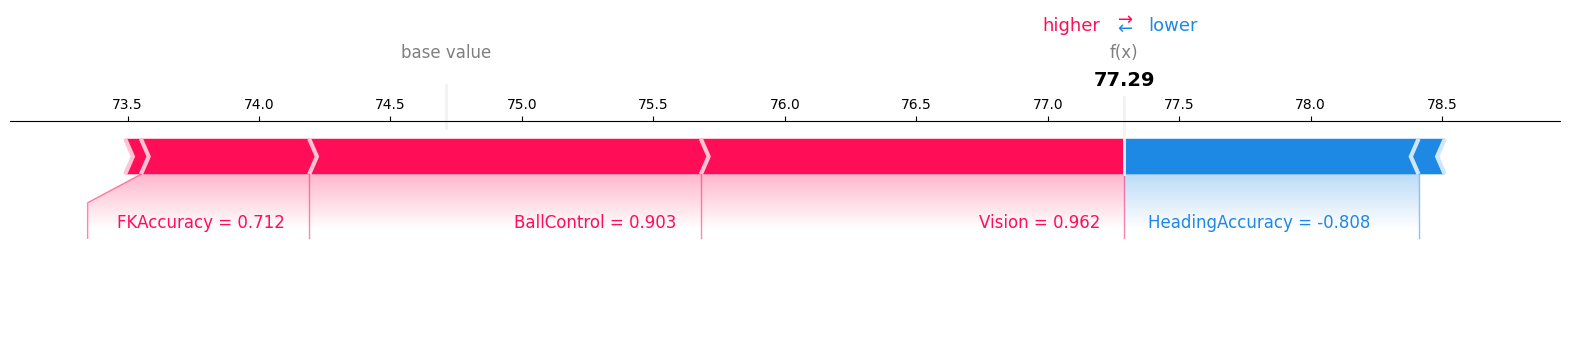

                (268421, M. Tel, 2024)  shap
FKAccuracy                        56.0  0.64
HeadingAccuracy                   55.0 -1.12
BallControl                       76.0  1.49
SprintSpeed                       74.0 -0.10
Strength                          67.0  0.06
Vision                            67.0  1.61


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


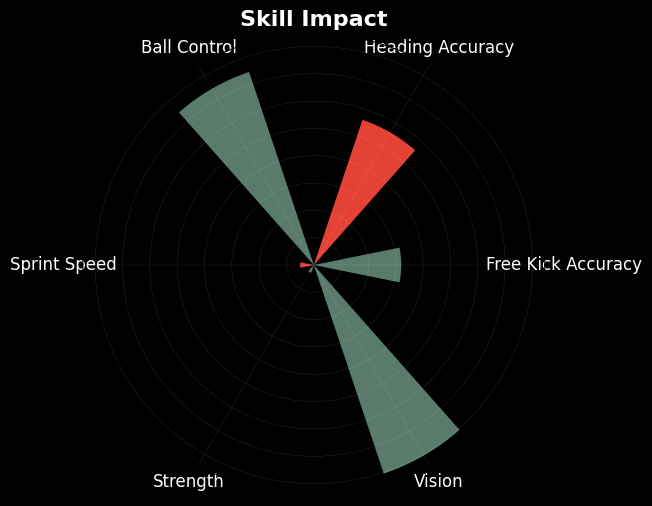

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [79.40299602]
[(259399, 'R. Højlund', 2024)]


100%|██████████| 1/1 [00:00<00:00, 15.85it/s]


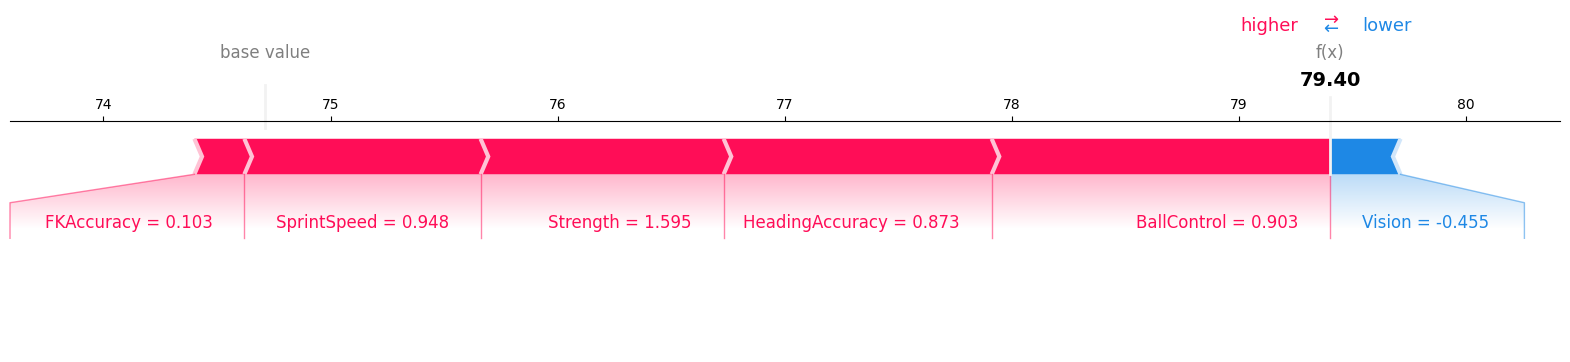

                (259399, R. Højlund, 2024)  shap
FKAccuracy                            48.0  0.22
HeadingAccuracy                       70.0  1.18
BallControl                           76.0  1.49
SprintSpeed                           85.0  1.04
Strength                              84.0  1.07
Vision                                54.0 -0.31


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


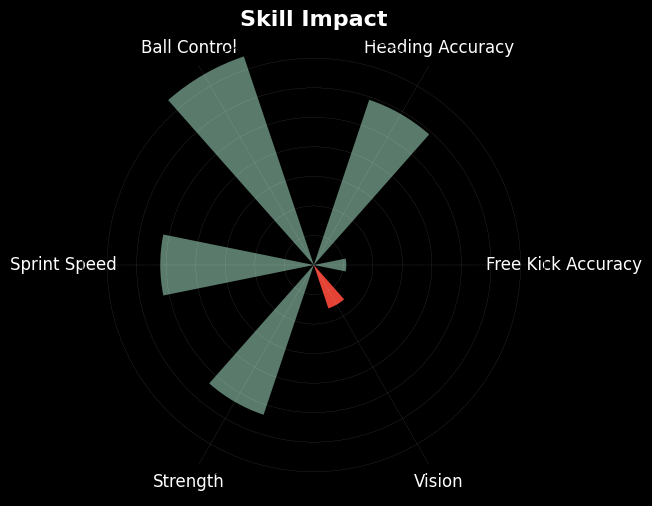

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [78.99431505]
[(240833, 'Y. Moukoko', 2024)]


100%|██████████| 1/1 [00:00<00:00, 21.74it/s]


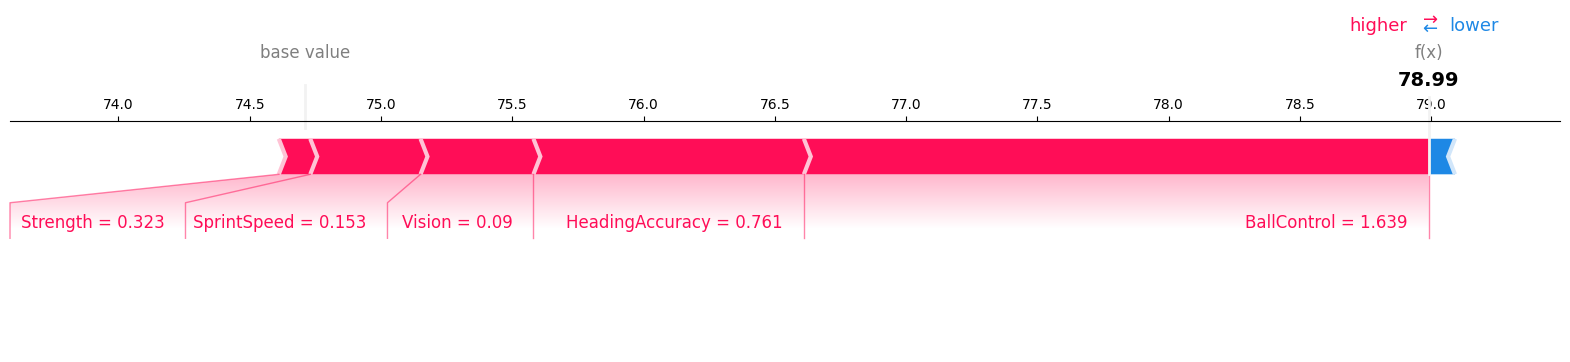

                (240833, Y. Moukoko, 2024)  shap
FKAccuracy                            42.0 -0.10
HeadingAccuracy                       69.0  1.03
BallControl                           81.0  2.38
SprintSpeed                           79.0  0.42
Strength                              68.0  0.12
Vision                                59.0  0.43


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


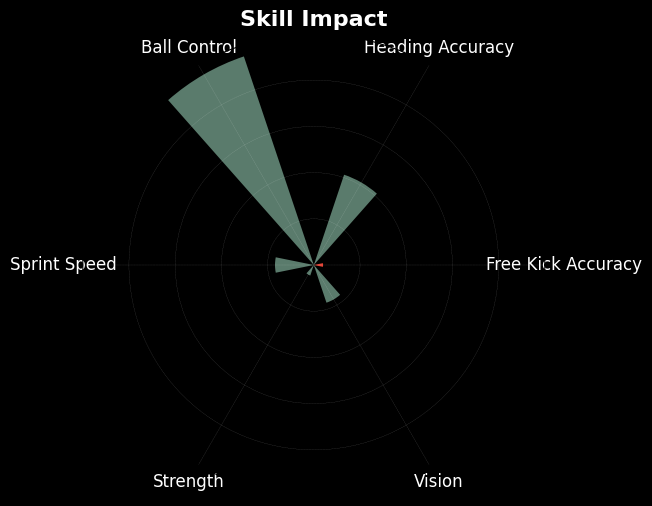

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [83.39361056]
[(251852, 'K. Adeyemi', 2024)]


100%|██████████| 1/1 [00:00<00:00, 10.15it/s]


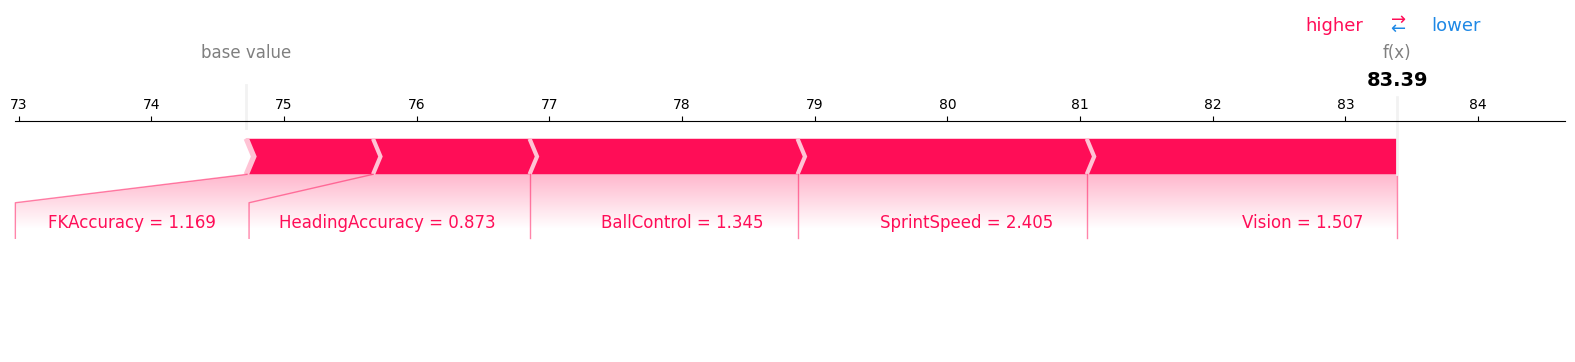

                (251852, K. Adeyemi, 2024)  shap
FKAccuracy                            62.0  0.95
HeadingAccuracy                       70.0  1.18
BallControl                           79.0  2.02
SprintSpeed                           96.0  2.18
Strength                              66.0  0.01
Vision                                72.0  2.34


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


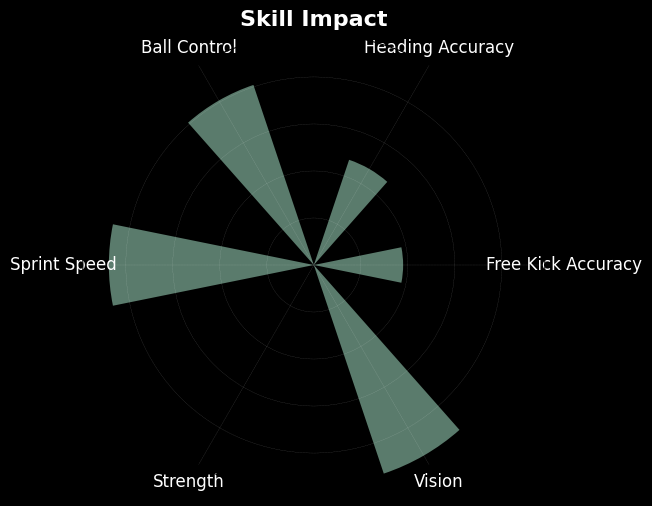

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [77.99397921]
[(256658, 'J. Ngankam', 2024)]


100%|██████████| 1/1 [00:00<00:00, 19.01it/s]


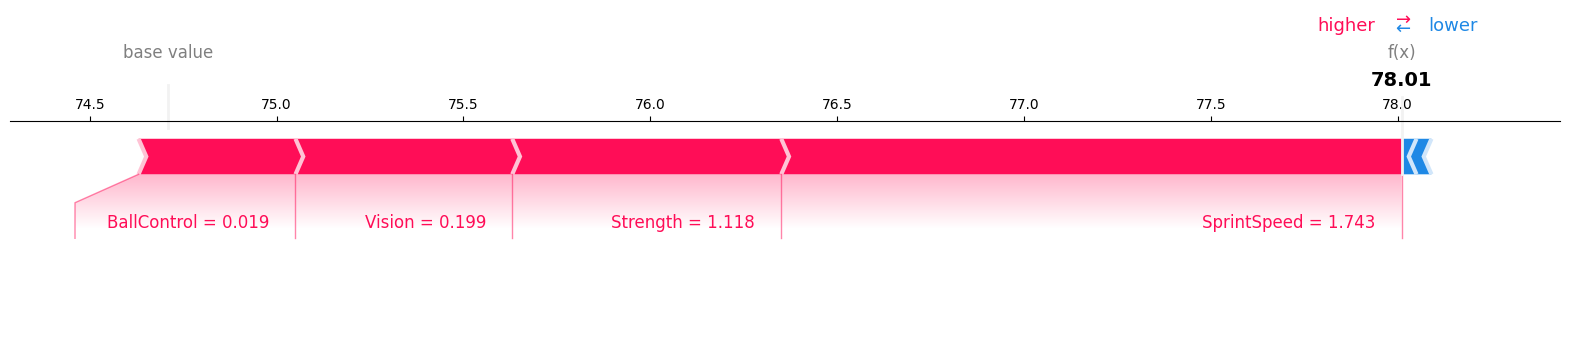

                (256658, J. Ngankam, 2024)  shap
FKAccuracy                            43.0 -0.04
HeadingAccuracy                       62.0 -0.04
BallControl                           70.0  0.42
SprintSpeed                           91.0  1.66
Strength                              78.0  0.72
Vision                                60.0  0.58


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


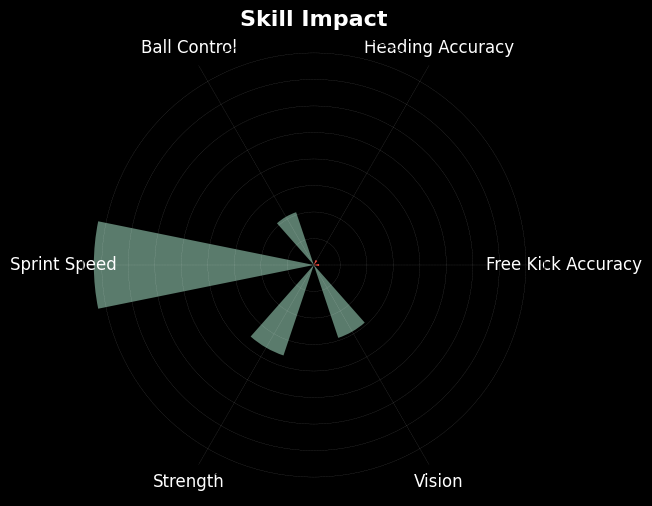

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [81.048931]
[(256790, 'J. Musiala', 2024)]


100%|██████████| 1/1 [00:00<00:00, 11.15it/s]


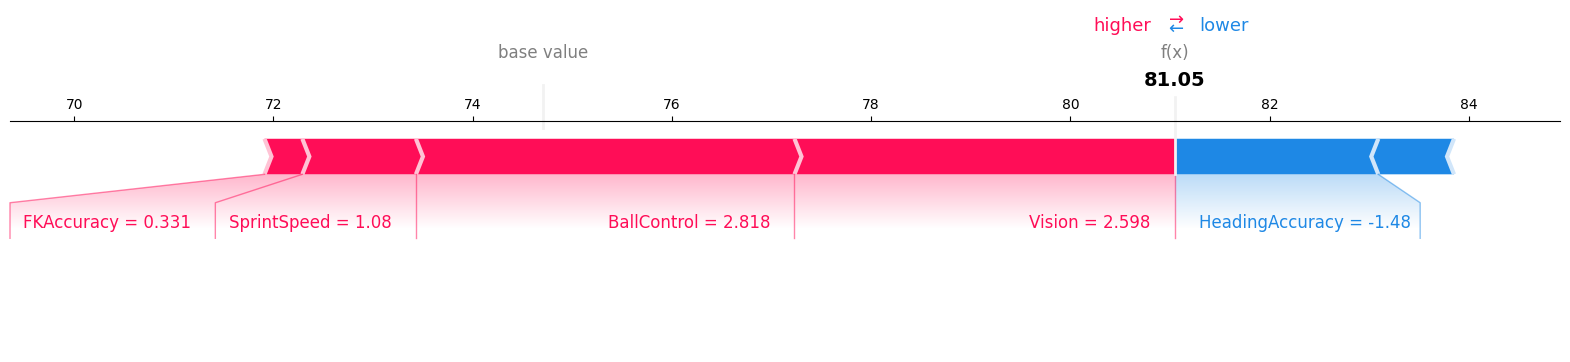

                (256790, J. Musiala, 2024)  shap
FKAccuracy                            51.0  0.38
HeadingAccuracy                       49.0 -2.04
BallControl                           89.0  3.80
SprintSpeed                           86.0  1.14
Strength                              53.0 -0.76
Vision                                82.0  3.82


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


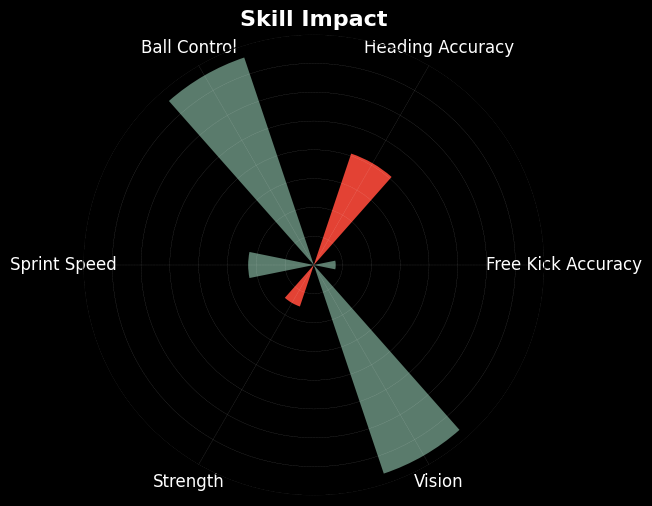

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [7]:
for ID in [268421,259399,240833,251852,256658,256790]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
    player.rename(index=CONFIG.plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "#5a7b6c", negative_color='#e34234')
    
    print("-"*150)
    print("#"*150)

# Data Analysis

              precision    recall  f1-score   support

       False       0.96      0.93      0.94        27
        True       0.50      0.67      0.57         3

    accuracy                           0.90        30
   macro avg       0.73      0.80      0.76        30
weighted avg       0.92      0.90      0.91        30

pred [85.98708078]
[(251854, 'Pedri', 2024)]


100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


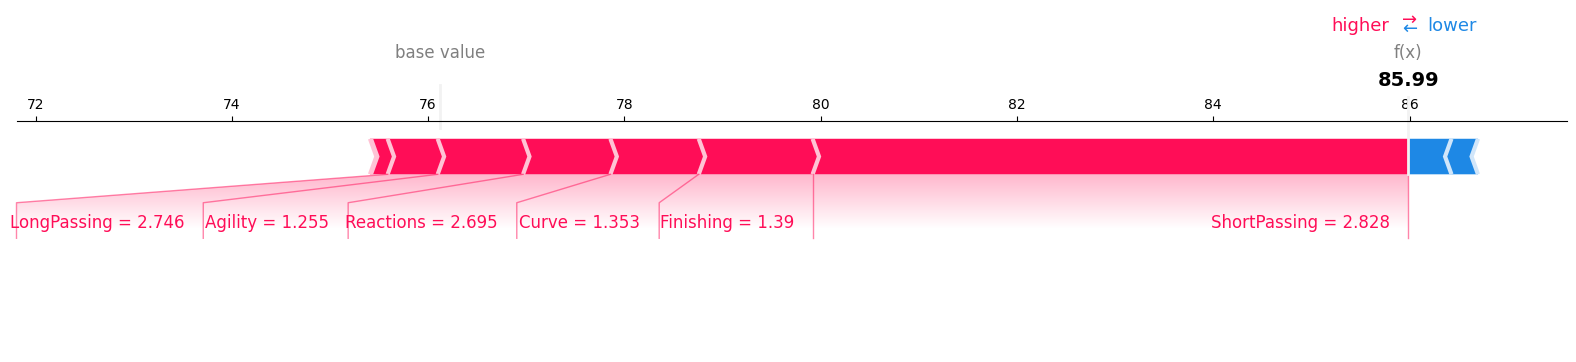

             (251854, Pedri, 2024)  shap
Finishing                     72.0  1.16
ShortPassing                  88.0  6.07
Volleys                       56.0  0.01
Curve                         79.0  0.90
LongPassing                   86.0  0.51
Acceleration                  81.0 -0.27
SprintSpeed                   76.0  0.17
Agility                       88.0  0.87
Reactions                     87.0  0.89
Aggression                    62.0 -0.44


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


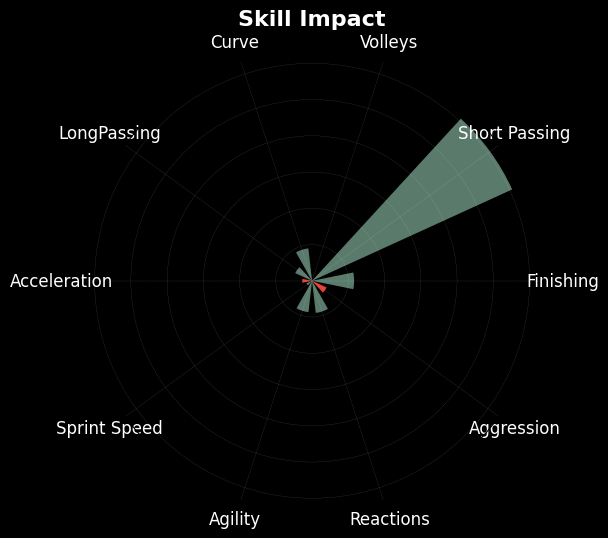

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [87.64228917]
[(256630, 'F. Wirtz', 2024)]


100%|██████████| 1/1 [00:00<00:00,  4.70it/s]


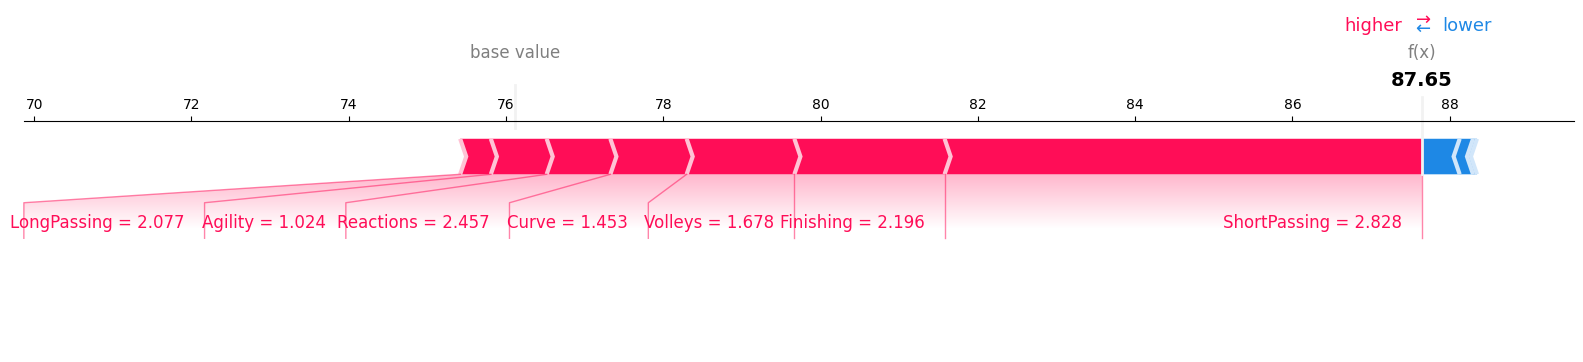

             (256630, F. Wirtz, 2024)  shap
Finishing                        78.0  1.91
ShortPassing                     88.0  6.07
Volleys                          73.0  1.37
Curve                            80.0  0.97
LongPassing                      81.0  0.39
Acceleration                     78.0 -0.17
SprintSpeed                      70.0 -0.05
Agility                          86.0  0.71
Reactions                        85.0  0.81
Aggression                       63.0 -0.48


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


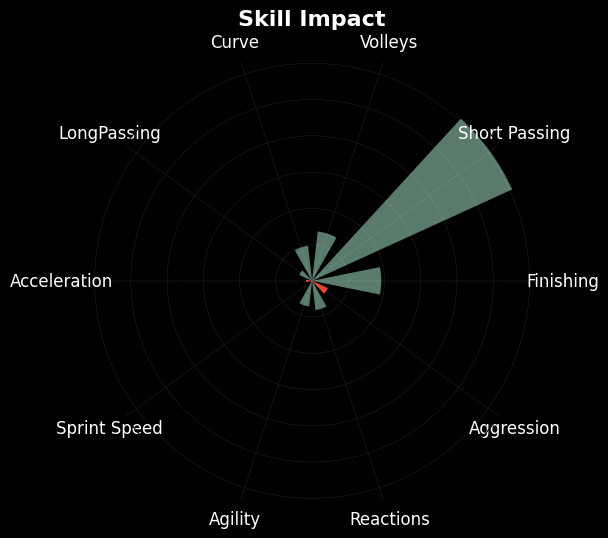

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [85.82172524]
[(256790, 'J. Musiala', 2024)]


100%|██████████| 1/1 [00:00<00:00,  4.79it/s]


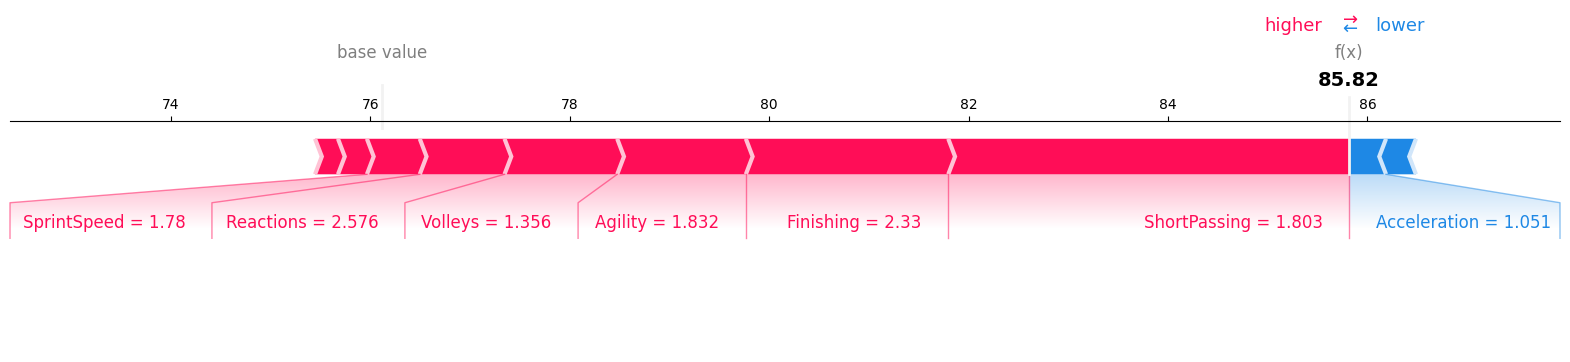

             (256790, J. Musiala, 2024)  shap
Finishing                          79.0  2.03
ShortPassing                       82.0  4.02
Volleys                            70.0  1.13
Curve                              69.0  0.23
LongPassing                        77.0  0.29
Acceleration                       84.0 -0.37
SprintSpeed                        86.0  0.53
Agility                            93.0  1.29
Reactions                          86.0  0.85
Aggression                         59.0 -0.30


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


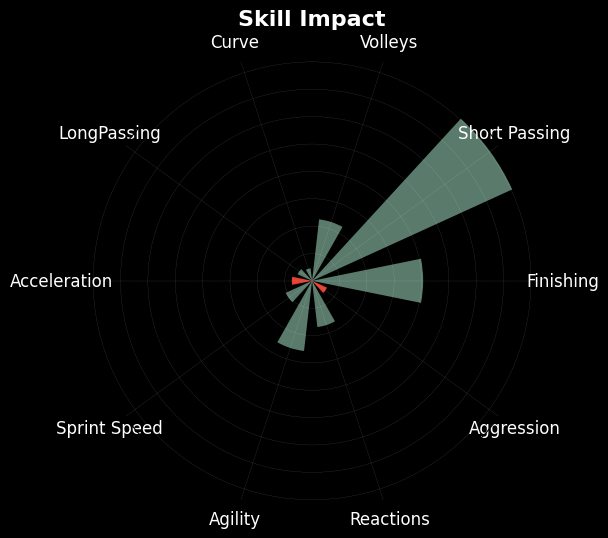

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [82.09609914]
[(251852, 'K. Adeyemi', 2024)]


100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


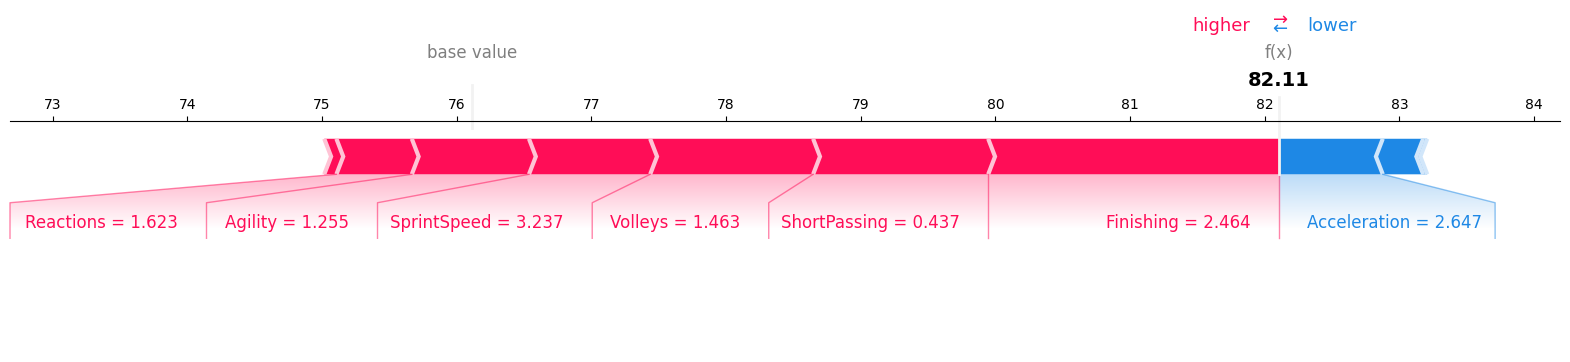

             (251852, K. Adeyemi, 2024)  shap
Finishing                          80.0  2.16
ShortPassing                       74.0  1.30
Volleys                            71.0  1.21
Curve                              67.0  0.09
LongPassing                        64.0 -0.03
Acceleration                       96.0 -0.77
SprintSpeed                        96.0  0.90
Agility                            88.0  0.87
Reactions                          78.0  0.56
Aggression                         59.0 -0.30


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


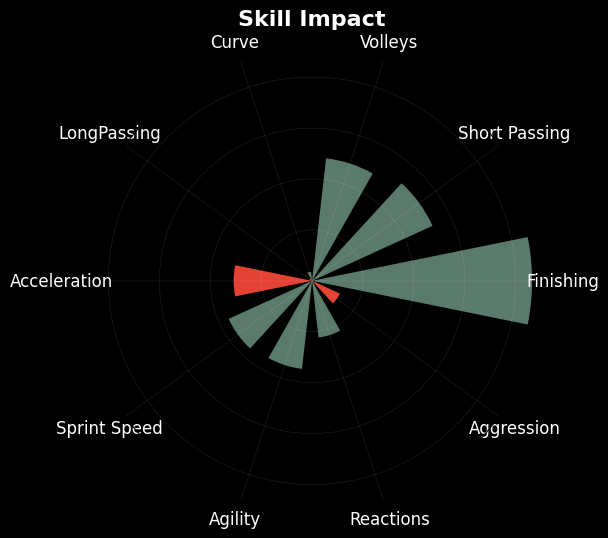

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [9]:
import pickle

with open(f"{CONFIG.MODELS}/offense_potential_attacking_midfielder.pkl", "rb") as file:
    loaded_object = pickle.load(file)

chosen_object = loaded_object[ 'Huber Regression']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']
explainer = chosen_object['explainer']
print(chosen_object['Classification Report'])
# print(chosen_object['AUC'])

from config import plot_feature_mapping

for ID in [251854,256630,256790,251852]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
    player.rename(index=plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "#5a7b6c", negative_color='#e34234')
    
    print("-"*150)
    print("#"*150)